Nama : Purwohudiono

NIM : 5312422044

Prodi : Teknik Komputer

Mata Kuliah : Pengolahan Sinyal Digital

In [1]:
# install modul scikit-dsp-comm
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.2 MB/s eta 0:00:00


In [2]:
# Memuat modul-modul yang diperlukan dan menampilkan plot secara langsung di notebook
%pylab inline

# Mengimpor modul-modul yang diperlukan dari sk_dsp_comm package
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh

# Mengimpor modul scipy.signal sebagai signal
import scipy.signal as signal

# Mengimpor fungsi Audio dan display dari IPython.display
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [3]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

In [4]:
# Mengimpor modul fir_design_helper dari paket sk_dsp_comm
import sk_dsp_comm.fir_design_helper as fir_d

# Mengimpor modul iir_design_helper dari paket sk_dsp_comm
import sk_dsp_comm.iir_design_helper as iir_d

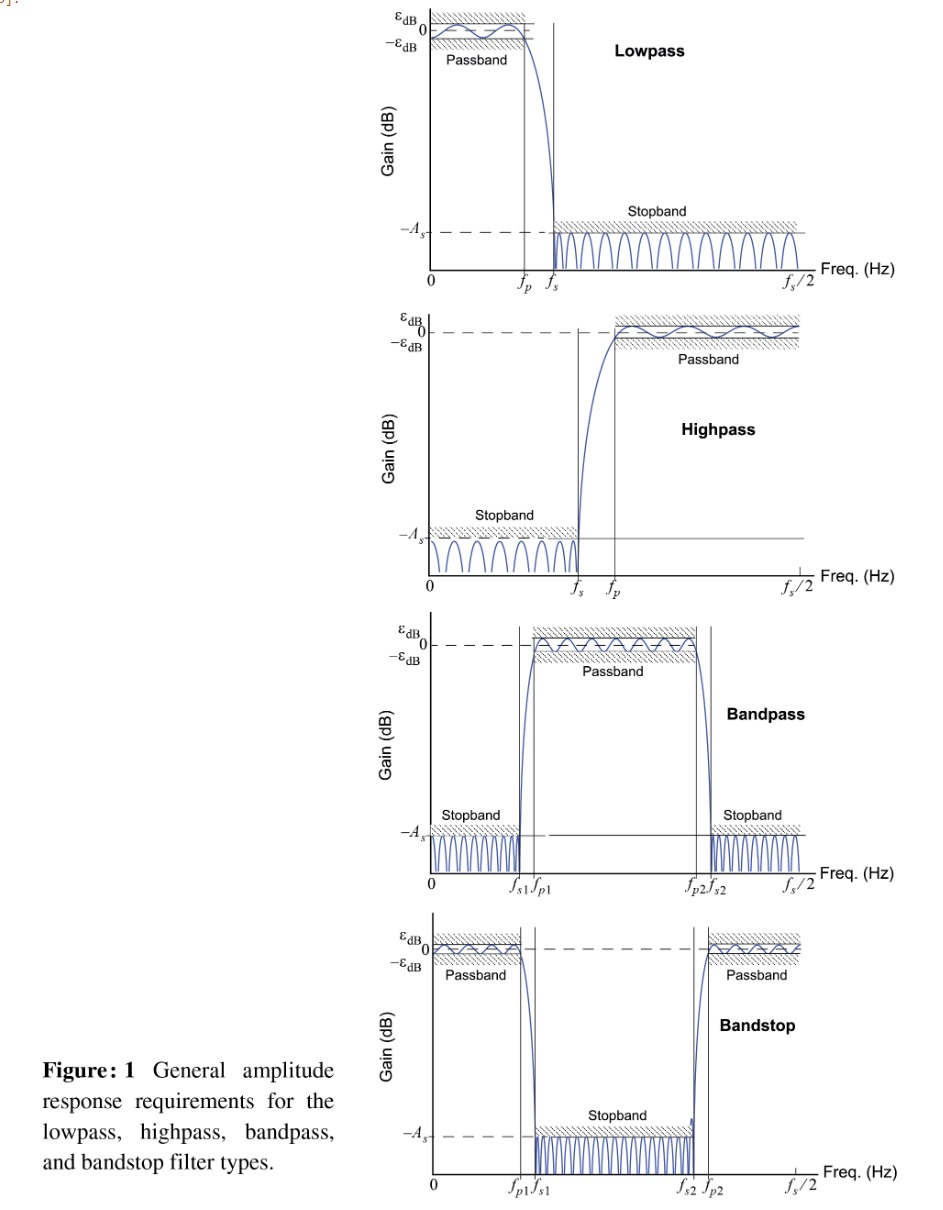

Gambar ini memperlihatkan karakteristik respons amplitudo dari berbagai jenis filter, yaitu filter lowpass, highpass, bandpass, dan bandstop. Berikut adalah penjelasan setiap bagian dalam gambar tersebut:

1. Filter Lowpass
- Passband: Area di mana sinyal frekuensi rendah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
- Stopband: Area di mana sinyal frekuensi tinggi diblokir atau amplitudonya sangat berkurang.
- Fc atau cutoff frequency: Frekuensi batas yang memisahkan passband dari stopband.

2. Filter Highpass
- Passband: Area di mana sinyal frekuensi tinggi dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
- Stopband: Area di mana sinyal frekuensi rendah diblokir atau amplitudonya sangat berkurang.
- Fc atau cutoff frequency: Frekuensi batas yang memisahkan passband dari stopband.

3. Filter Bandpass
- Passband: Area di mana sinyal frekuensi menengah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
- Stopband: Area di mana sinyal frekuensi tinggi dan rendah diblokir atau amplitudonya sangat berkurang.
- f1 dan f2: Frekuensi batas yang memisahkan passband dari stopband.

4. Filter Bandstop
- Passband: Area di mana sinyal frekuensi tinggi dan rendah dapat melewati filter tanpa mengalami penurunan amplitudo yang signifikan.
- Stopband: Area di mana sinyal frekuensi menengah diblokir atau amplitudonya sangat berkurang.
- f1 dan f2: Frekuensi batas yang memisahkan passband dari stopband.

Gambar ini membantu dalam memahami cara kerja masing-masing jenis filter dalam menyaring sinyal pada frekuensi tertentu, membiarkan atau menghalangi sinyal sesuai dengan kebutuhan aplikasi tertentu.

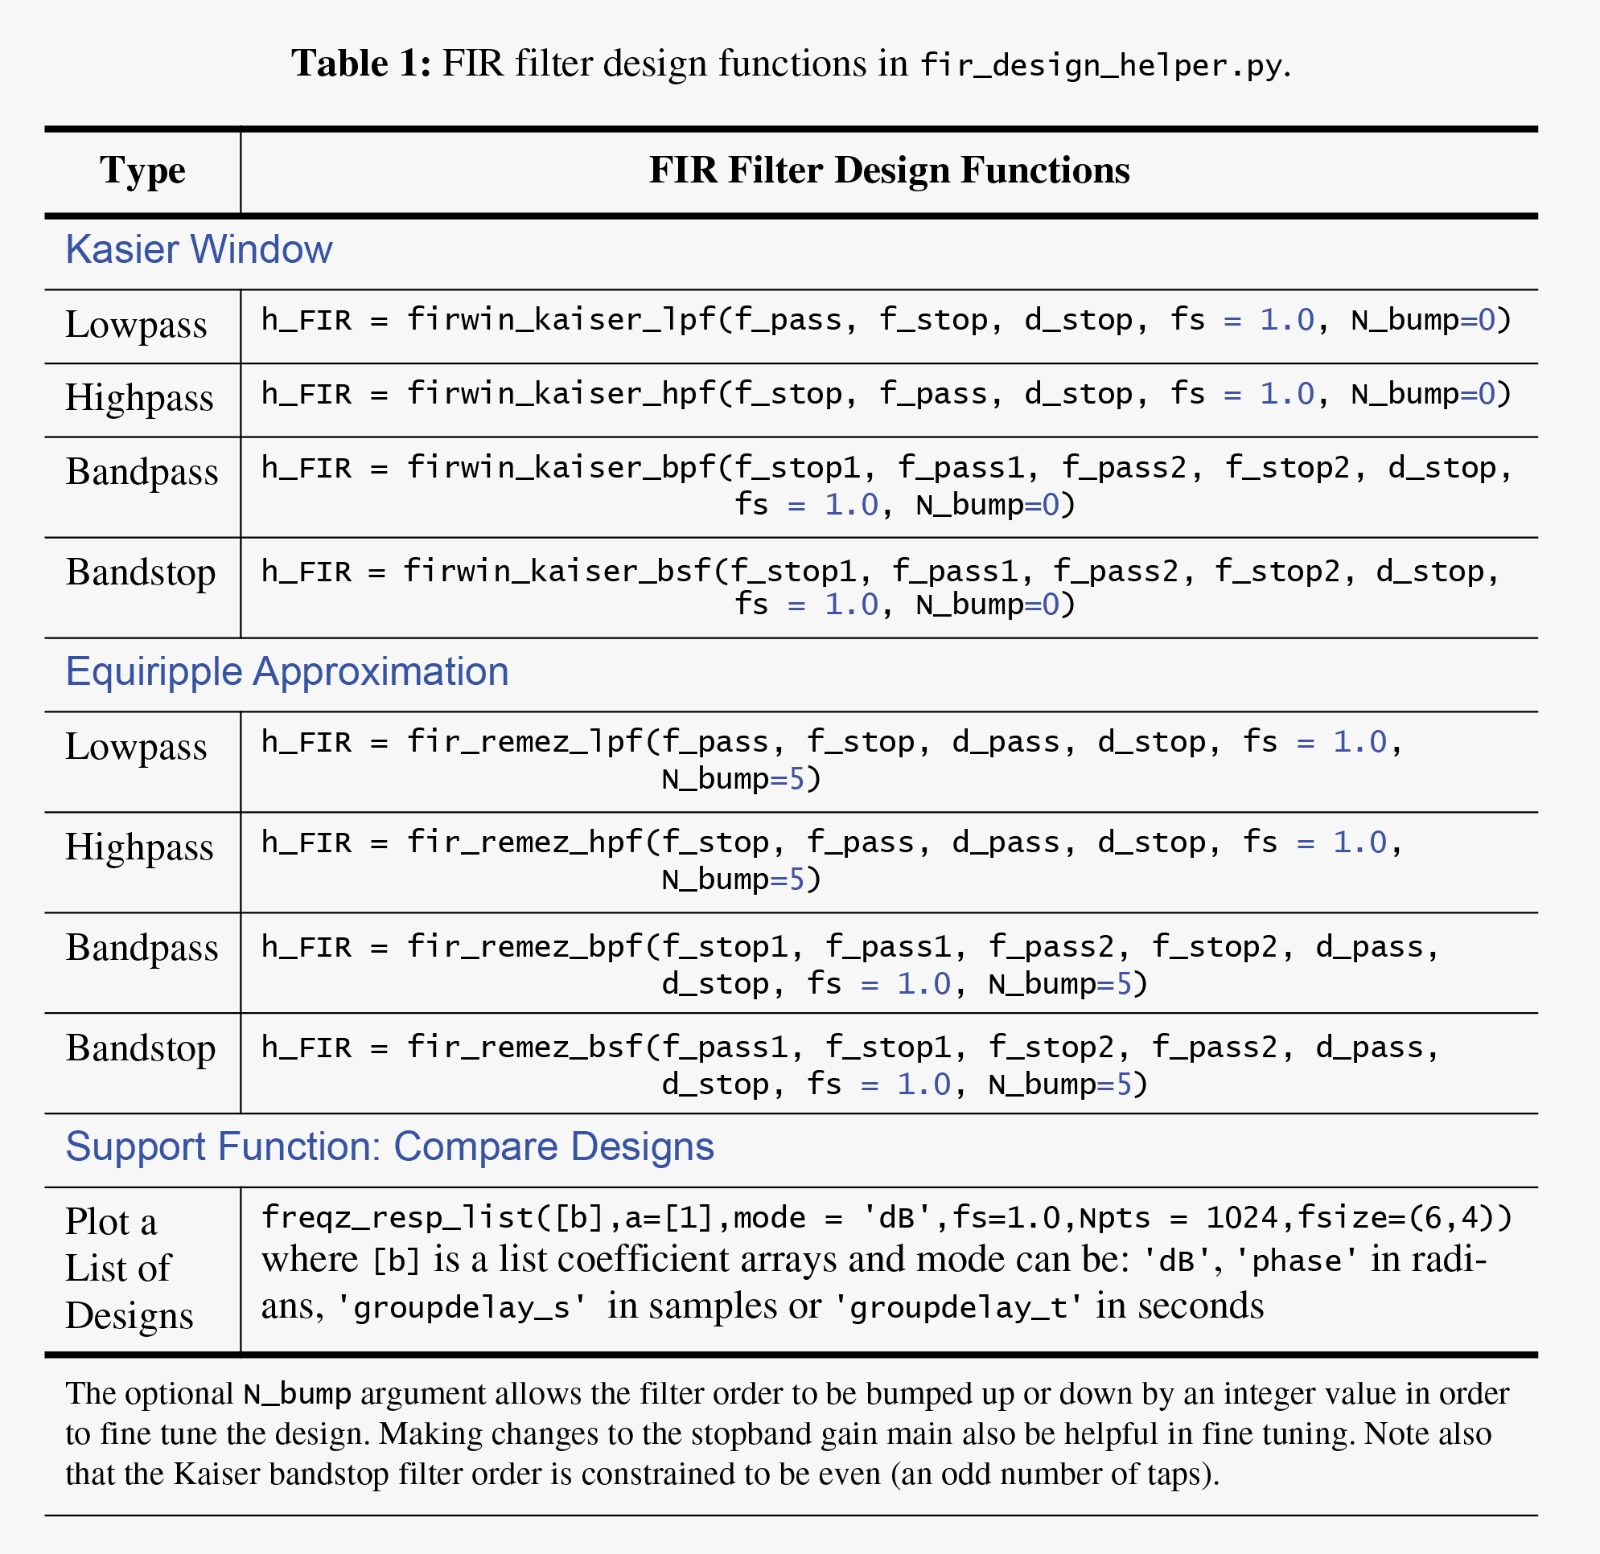

Gambar yang ditunjukkan adalah tabel yang merangkum beberapa fungsi desain filter FIR (Finite Impulse Response) di file fir_design_helper.py. Tabel ini mencakup tiga kategori utama desain filter: Kaiser Window, Equiripple Approximation, dan Support Function, dengan rincian setiap kategori sebagai berikut:

**Kaiser Window**
* Lowpass
  lpf = firwin_kaiser_lp(f_stop, f_pass, fs=1.0, n_taps=20)
* Highpass
hpf = firwin_kaiser_hp(f_stop, f_pass, fs=1.0, n_taps=20)
* Bandpass
bpf = firwin_kaiser_bp(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Bandstop
bsf = firwin_kaiser_bs(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Equiripple Approximation
Lowpass
lpf = fir_remez_lpf(f_stop, f_pass, fs=1.0, N=132, K_pass=1, K_stop=60)
* Highpass
hpf = fir_remez_hpf(f_stop, f_pass, fs=1.0, N = 132, K_pass=1, K_stop=60)
* Bandpass
bpf = fir_remez_bpf(f_stop1, f_pass1, f_pass2, f_stop2, fs = 1.0, N = 132, K_pass=1, K_stop=60)
* Bandstop
bsf = fir_remez_bsf(f_stop1, f_pass1, f_pass2, f_stop2, fs=1.0, n_taps=20)
* Support Function: Compare Designs
Compare Designs
compare_designs(f_pass, f_stop, fs=1.0)

Tabel ini berguna sebagai referensi untuk memilih dan mengimplementasikan jenis filter FIR yang tepat menggunakan koding yang sudah disediakan dalam file fir_design_helper.py.

In [6]:
# Mendesain filter FIR dengan metode Kaiser menggunakan fungsi firwin_kaiser_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)

# Mendesain filter FIR dengan metode Remez menggunakan fungsi fir_remez_lpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

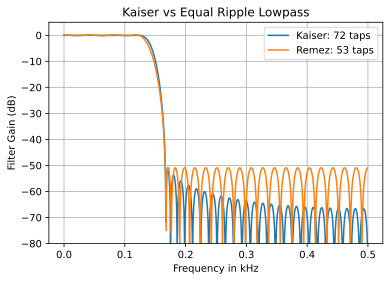

In [7]:
# Menghitung respons frekuensi dari kedua filter FIR yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k dan b_r),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar ini menunjukkan analisis perbandingan antara dua filter lowpass: Kaiser window dan metode Parks-McClellan (Remez). Berikut adalah rincian dari konten gambar tersebut:

1. Judul: "Kaiser vs Equal Ripple Lowpass"

2. Sumbu:
- Sumbu x menunjukkan frekuensi dalam kHz.
- Sumbu y menunjukkan gain filter dalam dB.

3. Detail Plot:
- Grafik membandingkan dua jenis filter lowpass yang berbeda.
- Garis Biru: Mewakili filter lowpass dengan Kaiser window yang menggunakan 72 taps.
- Garis Oranye: Mewakili filter lowpass Equal Ripple (Remez) yang menggunakan 53 taps.

4. Legenda:
- "Kaiser: 72 taps" menunjukkan garis biru.
- "Remez: 53 taps" menunjukkan garis oranye.

Grafik ini memperlihatkan respons frekuensi dari kedua filter tersebut. Filter Kaiser window (biru) memiliki transisi yang lebih halus dan lebih sedikit gelombang di stop band dibandingkan dengan filter Remez (oranye), yang menunjukkan gelombang yang lebih tajam. Secara keseluruhan, gambar ini mengilustrasikan perbedaan kinerja antara kedua metode desain filter dalam hal gain filter pada berbagai frekuensi.







In [8]:
# Mendesain filter FIR high-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (50), dan beta (1.0)
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)

# Mendesain filter FIR high-pass dengan metode Remez menggunakan fungsi fir_remez_hpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1/8 dan 1/6),
# lebar band stop (0.2), jumlah taps (50), dan beta (1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

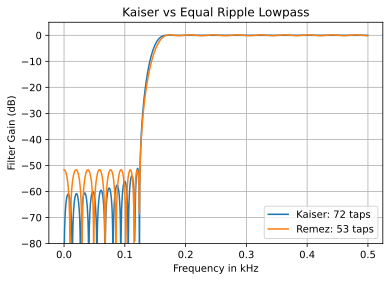

In [9]:
# Menghitung respons frekuensi dari kedua filter FIR high-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_hp dan b_r_hp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=1 karena normalized frequency).
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')

# Menampilkan grid pada plot
grid()


Gambar tersebut memperlihatkan perbandingan antara dua jenis filter lowpass digital: satu menggunakan jendela Kaiser (digambarkan dengan garis biru) dan yang lain menggunakan metode Equal Ripple atau Remez (digambarkan dengan garis oranye). Sumbu x menunjukkan frekuensi dalam kilohertz (kHz), sedangkan sumbu y menunjukkan gain filter dalam desibel (dB).

Filter dengan jendela Kaiser memiliki 72 taps, sedangkan filter Remez memiliki 53 taps. Keduanya memiliki frekuensi cutoff yang sama, yaitu sekitar 0.1 kHz. Filter Kaiser menunjukkan respon yang lebih halus di stopband dengan sidelobes yang lebih rendah namun lebih banyak dibandingkan filter Remez. Sebaliknya, filter Remez memiliki sidelobes yang lebih tinggi tetapi lebih terdistribusi secara merata di stopband.

Perbandingan ini menunjukkan bahwa filter Remez dapat mencapai karakteristik filter yang diinginkan dengan jumlah taps yang lebih sedikit dibandingkan filter Kaiser, meskipun ada kompromi pada karakteristik sidelobe. Filter Remez sering dipilih ketika diperlukan desain dengan sidelobe yang lebih konsisten, sedangkan filter Kaiser mungkin lebih disukai untuk mengurangi sidelobe secara keseluruhan.

In [10]:
# Mendesain filter FIR band-pass dengan metode Kaiser menggunakan fungsi firwin_kaiser_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (50), dan frekuensi sampling (48000).
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)

# Mendesain filter FIR band-pass dengan metode Remez menggunakan fungsi fir_remez_bpf()
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (7000 dan 8000),
# normalized band edges (14000 dan 15000), lebar band stop (0.2), jumlah taps (50), dan frekuensi sampling (48000).
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

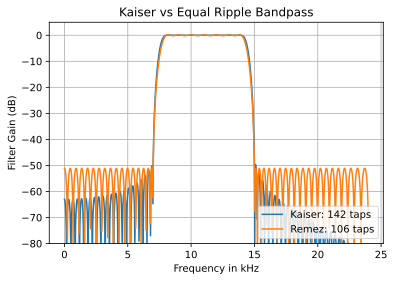

In [11]:
# Menghitung respons frekuensi dari kedua filter FIR band-pass yang telah didesain
# menggunakan fungsi freqz_resp_list() dari paket fir_d.
# Parameter-parameter yang diberikan adalah daftar koefisien filter (b_k_bp dan b_r_bp),
# daftar koefisien denomiator (sama-sama 1 karena filter FIR),
# tipe respons (dB untuk respons dalam dB),
# frekuensi sampling (fs=48 karena frekuensi sampling adalah 48 kHz).
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Bandpass')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan jumlah taps untuk setiap filter, diletakkan di pojok kanan bawah
legend((r'Kaiser: %d taps' % len(b_k_bp), r'Remez: %d taps' % len(b_r_bp)), loc='lower right')

# Menampilkan grid pada plot
grid()


Gambar tersebut memperlihatkan perbandingan antara dua jenis filter bandpass digital: satu menggunakan jendela Kaiser (ditunjukkan dengan garis biru) dan yang lain menggunakan metode Equal Ripple atau Remez (ditunjukkan dengan garis oranye). Sumbu x menunjukkan frekuensi dalam kilohertz (kHz), sedangkan sumbu y menunjukkan gain filter dalam desibel (dB).

Filter bandpass ini memiliki dua frekuensi cutoff, yaitu sekitar 5 kHz dan 15 kHz, di mana frekuensi antara 5 kHz dan 15 kHz diteruskan (passband), sementara frekuensi di luar rentang tersebut diredam (stopband). Filter yang menggunakan jendela Kaiser memiliki 142 taps, sedangkan filter Remez memiliki 106 taps.

Dari gambar ini, kita dapat melihat bahwa:

- Filter Kaiser (142 taps): Memiliki sidelobes yang lebih rendah tetapi lebih banyak di stopband. Ini berarti filter ini lebih efektif dalam meredam frekuensi yang tidak diinginkan dengan fluktuasi yang lebih sedikit di stopband.
- Filter Remez (106 taps): Memiliki sidelobes yang lebih tinggi tetapi lebih merata di stopband. Meskipun memiliki lebih sedikit taps, filter ini mencapai performa passband yang serupa dengan filter Kaiser, dengan sidelobes yang lebih konsisten dan teratur di stopband.

Perbandingan ini menunjukkan bahwa filter Remez dapat mencapai karakteristik yang diinginkan dengan jumlah taps yang lebih sedikit dibandingkan filter Kaiser. Filter Remez sering dipilih ketika diperlukan desain dengan sidelobes yang lebih seragam, sementara filter Kaiser lebih disukai ketika pengurangan sidelobes secara keseluruhan lebih penting. Secara keseluruhan, pilihan antara kedua filter ini bergantung pada kebutuhan spesifik aplikasi, seperti pentingnya pengurangan sidelobes versus kompleksitas filter (jumlah taps).

In [14]:
# Mendesain filter FIR (Low-Pass) menggunakan fungsi fir_remez_lpf dari modul fir_design_helper

# Paramater:
# 3300, 4300 - Batasan frekuensi (cut-off frequencies) dari low-pass filter
# 0.5 - Lebar pita (bandwidth) filter sebagai faktor dari frekuensi sampling
# 60 - Orde filter (jumlah koefisien filter)
# 96000 - Frekuensi sampling (Hz)

# Menggunakan fungsi fir_remez_lpf untuk desain filter Remez (Low-Pass)
b_up = fir_d.fir_remez_lpf(3300, 4300, 0.5, 60, 96000)


In [15]:
# Membuat objek multirate_FIR menggunakan filter FIR (Low-Pass) yang telah didesain

# Paramater:
# b_up - Koefisien filter FIR (Low-Pass) yang telah didesain sebelumnya

# Menggunakan metode multirate_FIR dari modul multirate_helpers (mrh) untuk membuat objek multirate_FIR
mr_up = mrh.multirate_FIR(b_up)


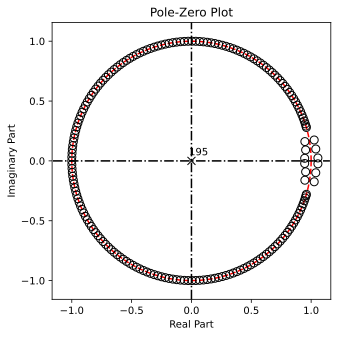

In [16]:
# Menampilkan konfigurasi pole-zero dari filter FIR (Low-Pass) dengan orde tinggi menggunakan metode zplane

# Memanggil metode zplane() dari objek multirate_FIR (mr_up) untuk menampilkan konfigurasi pole-zero dari filter FIR
mr_up.zplane()


Grafik di atas adalah plot pole-zero, yang umum digunakan dalam analisis sistem kontrol dan sinyal. Berikut adalah komponen utama dari plot ini:

1. Sumbu Nyata (Real Part) dan Sumbu Imajiner (Imaginary Part): Grafik ini adalah representasi dalam domain kompleks, di mana sumbu horizontal (Real Part) mewakili bagian nyata, dan sumbu vertikal (Imaginary Part) mewakili bagian imajiner.

2. Lingkaran Hitam (Pole) dan Lingkaran Merah (Zero):
- Pole (ditunjukkan dengan tanda "x" atau kadang-kadang dengan lingkaran hitam): Pole adalah titik di mana respons sistem (misalnya, fungsi transfer) menjadi tak hingga. Pada plot ini, terdapat banyak poles yang membentuk pola hampir bulat.
- Zero (ditunjukkan dengan lingkaran merah): Zero adalah titik di mana respons sistem menjadi nol. Di grafik ini, zeros terletak di dekat bagian kanan sumbu nyata dengan nilai nyata mendekati 1.

3. Lingkaran Unit: Lingkaran unit pada plot ini menunjukkan batas stabilitas dalam domain z. Sistem dianggap stabil jika poles berada di dalam lingkaran unit. Pada plot ini, sebagian besar poles terletak di dekat lingkaran unit (baik pada garis tersebut maupun di dalamnya).

4. Crosshair (Garis Tanda Tengah): Garis putus-putus yang sejajar dan melintang di tengah grafik ini menunjukkan titik tengah dari sumbu nyata dan imajiner, memberikan referensi pusat di mana bagian nyata dan imajiner adalah nol.

5. Label di Tengah (195): Menunjukkan posisi tertentu yang penting dalam konteks analisis sistem tersebut, kemungkinan besar mengacu pada nilai poles atau zeros yang signifikan atau dipertimbangkan dalam analisis.

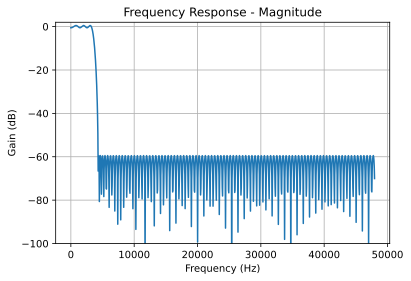

In [17]:
# Memverifikasi respons frekuensi di passband dan stopband sesuai dengan yang diharapkan
# menggunakan metode freq_resp() dari objek multirate_FIR.
# Parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (96000 Hz).
mr_up.freq_resp('db',96000)

Gambar di atas adalah grafik "Frequency Response - Magnitude" yang menunjukkan tanggapan frekuensi dari sebuah sistem atau filter. Respon ini diwakili oleh besar (gain) dalam dB (desibel) terhadap frekuensi dalam Hz (Hertz).

Berikut adalah penjelasan lebih rinci mengenai grafik tersebut:

1. Sumbu X (Frekuensi - Hz): Sumbu horizontal (X) menunjukkan frekuensi dalam Hertz (Hz). Jarak di antara nilai pada sumbu ini menunjukkan rentang frekuensi yang diperiksa, mulai dari 0 Hz hingga 50.000 Hz (50 kHz).

2. Sumbu Y (Gain - dB): Sumbu vertikal (Y) menunjukkan besar atau gain dalam desibel (dB). Nilai gain ini menunjukkan seberapa banyak sinyal diperkuat atau dilemahkan pada setiap frekuensi. Nilai positif menunjukkan penguatan sinyal, sedangkan nilai negatif menunjukkan pelemahan sinyal.

3. Karakteristik Grafik:
- Pada frekuensi sangat rendah (sekitar 0 Hz) hingga sekitar 2.000 Hz, gain hampir konstan di 0 dB, menunjukkan bahwa sinyal dibiarkan melewati tanpa perubahan.
- Setelah frekuensi sekitar 2.000 Hz, terdapat penurunan drastis pada gain yang mencapai hampir -80 dB sekitar 10.000 Hz dan terus menunjukkan pola fluktuatif hingga frekuensi tertinggi yang diplot, yaitu 50.000 Hz. Pola fluktuatif ini menunjukkan adanya variasi dalam respon frekuensi pada rentang yang lebih tinggi.

4. Interpretasi:
- Grafik ini menunjukkan bahwa sistem atau filter tersebut bekerja sebagai low-pass filter, membiarkan frekuensi rendah lewat tanpa perubahan signifikan, tetapi sangat melemahkan frekuensi tinggi di atas 2.000 Hz.
- Ripples pada bagian frekuensi tinggi mungkin menunjukkan karakteristik tertentu dari filter, seperti desain Chebyshev atau filter lain yang memiliki respon berombak di bagian stop-band.

In [18]:
# Menghitung jumlah taps dari filter FIR dengan mengurangkan 1 dari panjang koefisien filter (len(b_up)-1)
# dan kemudian membaginya dengan 2.
(len(b_up-1))/2

98.0

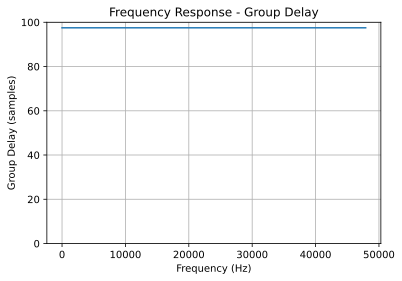

In [19]:
# Memperoleh nilai group delay dari filter FIR

# Paramater:
# 'groupdelay_s' - Jenis respon yang diinginkan (group delay dalam satuan detik)
# 96000 - Frekuensi sampling (Hz)
# [0, 100] - Rentang frekuensi untuk analisis group delay (dalam Hz)

# Memanggil fungsi freq_resp() dari objek multirate_FIR (mr_up) untuk memperoleh group delay
# Dalam satuan detik (s), pada frekuensi sampling 96000 Hz, dengan rentang frekuensi [0, 100] Hz
mr_up.freq_resp('groupdelay_s', 96000, [0, 100])


Gambar ini adalah grafik respon frekuensi yang menunjukkan Delay Grup dari suatu sistem, berjudul "Frequency Response - Group Delay".

Pada sumbu horizontal (x) grafik, ditampilkan frekuensi dalam Hertz (Hz), yang berkisar dari 0 hingga 50.000 Hz. Sementara itu, sumbu vertikal (y) menampilkan Delay Grup dalam satuan sampel, berkisar dari 0 hingga 100 sampel.

Grafik ini menunjukkan bahwa Delay Grup memiliki nilai konstan sebesar 100 sampel untuk seluruh rentang frekuensi yang ditampilkan. Ini berarti sistem tersebut mempertahankan waktu tunda yang sama untuk semua frekuensi dalam rentang tersebut.

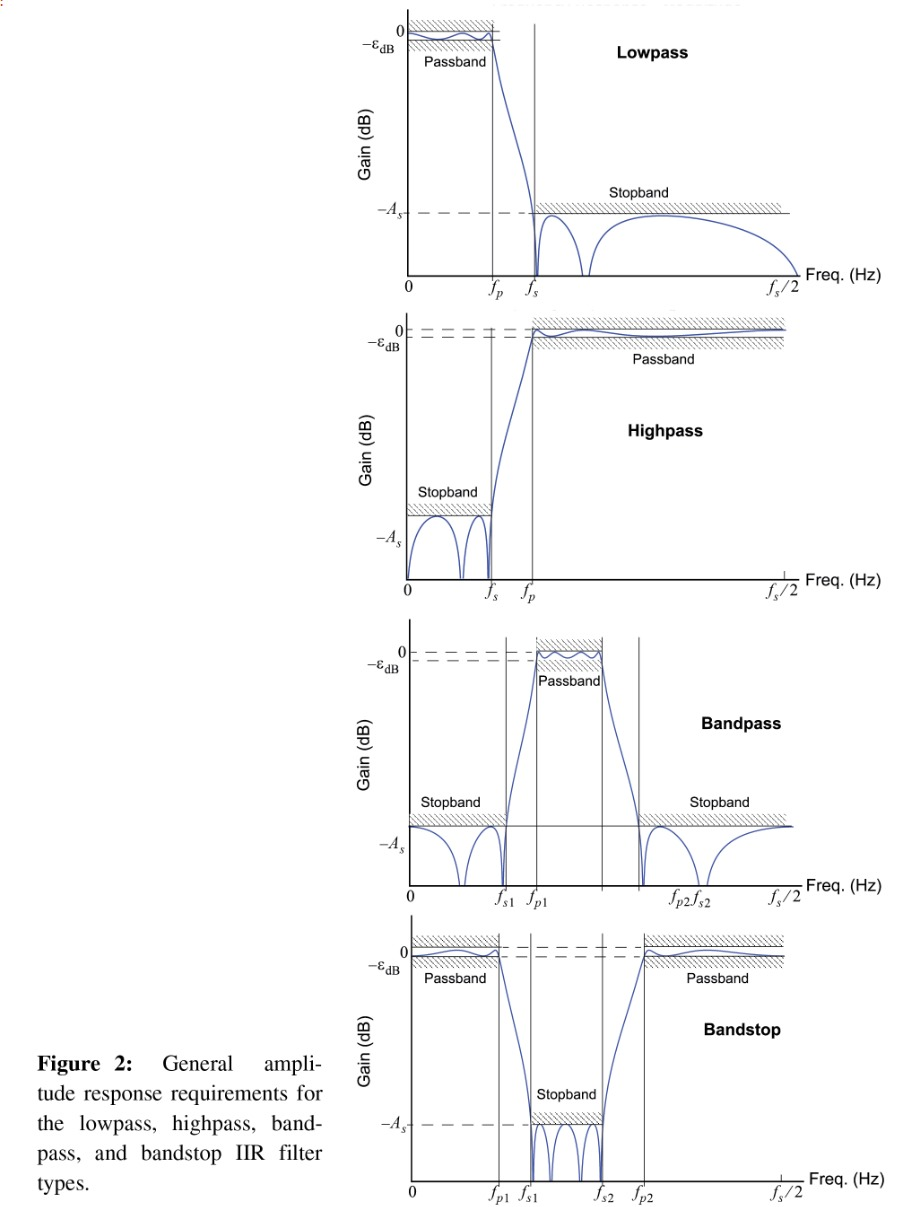

Gambar tersebut memperlihatkan respon amplitudo untuk berbagai jenis filter IIR (Infinite Impulse Response), termasuk filter lowpass, highpass, bandpass, dan bandstop. Berikut adalah penjelasan untuk setiap jenis filter yang tergambar:

1. Lowpass (Filter Tapis Rendah):
- Tujuan: Meneruskan frekuensi di bawah frekuensi cutoff (
𝑓
𝑐
f
c
​
 ) dan melemahkan frekuensi di atasnya.
- Penjelasan Gambar: Pada gambar lowpass, terlihat bahwa respon gain tetap tinggi dan konstan pada frekuensi di bawah
𝑓
𝑐
f
c
​
  (passband), dan turun secara signifikan setelah melewati
𝑓
𝑐
f
c
​
  (stopband).

2. Highpass (Filter Tapis Tinggi):
- Tujuan: Meneruskan frekuensi di atas frekuensi cutoff (
𝑓
𝑐
f
c
​
 ) dan melemahkan frekuensi di bawahnya.
- Penjelasan Gambar: Pada gambar highpass, terlihat bahwa respon gain rendah pada frekuensi rendah (stopband), dan mulai meningkat secara tajam setelah melewati
𝑓
𝑐
f
c
​
  menuju frekuensi tinggi (passband).

3. Bandpass (Filter Tapis Pita):
- Tujuan: Meneruskan frekuensi dalam rentang tertentu (antara
𝑓
1
f
1
​
  dan
𝑓
2
f
2
​
 ) dan melemahkan frekuensi di luar rentang tersebut.
- Penjelasan Gambar: Pada gambar bandpass, terdapat dua frekuensi cutoff (
𝑓
1
f
1
​
  dan
𝑓
2
f
2
​
 ). Respon gain tinggi di antara
𝑓
1
f
1
​
  dan
𝑓
2
f
2
​
  (passband), dan rendah di luar rentang tersebut.

4. Bandstop (Filter Tapis Notch):
- Tujuan: Melemahkan frekuensi dalam rentang tertentu (antara
𝑓
1
f
1
​
  dan
𝑓
2
f
2
​
 ) dan meneruskan frekuensi di luar rentang tersebut.
- Penjelasan Gambar: Pada gambar bandstop, respon gain rendah di antara
𝑓
1
f
1
​
  dan
𝑓
2
f
2
​
  (stopband), dan tinggi di luar rentang tersebut.

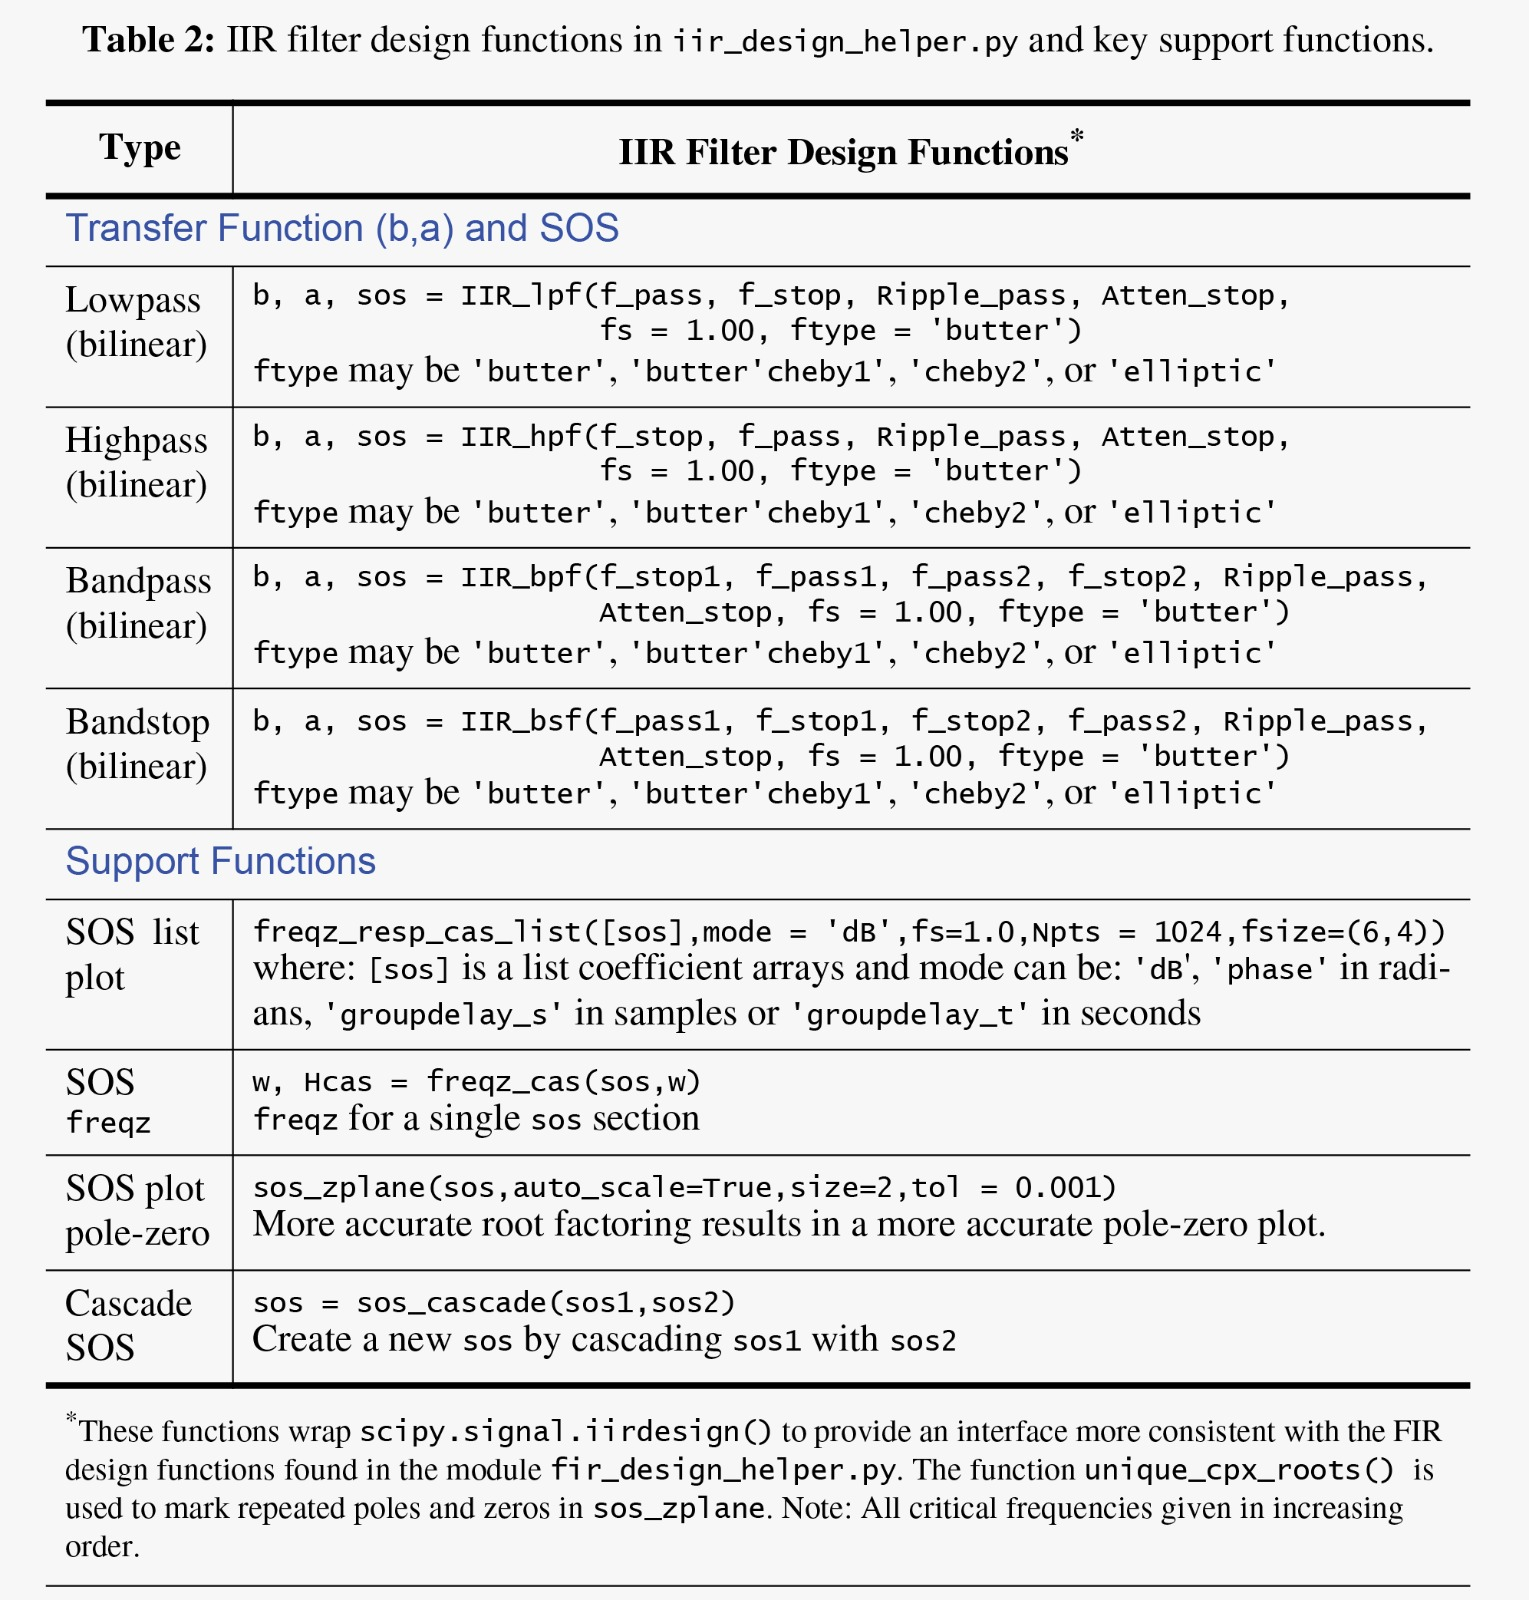

Tabel tersebut merupakan bagian dari iir_design_helper.py dan berjudul "Table 2: IIR filter design functions in iir_design_helper.py and key support functions." Tabel ini mengorganisir beberapa jenis fungsi desain filter IIR ke dalam beberapa kategori. Berikut adalah ringkasan konten dalam tabel:

1. Transfer Function (ba) and SOS:
- Termasuk berbagai sub-fungsi seperti ltiwrap (bilinear), highpass (bilinear), dan bandpass (bilinear).
- Kolom pertama menjelaskan nama dan parameter-parameter fungsi.
- Kolom kedua menampilkan contoh pemanggilan fungsi beserta parameter-parameter yang digunakan.

2. Support Functions:
- Terdiri dari sub-fungsi seperti replrast (sos), splitba (sos), dan others (ba).
- Kolom pertama memberikan penjelasan tentang nama sub-fungsi.
- Kolom kedua memberikan cuplikan kode atau ringkasan fungsi tersebut.

3. Type:
- Menyajikan jenis dari setiap fungsi desain filter IIR seperti "butter," "cheby1," "cheby2," "ellip," dsb.
- Memberikan penjelasan tentang parameter ftype yang digunakan untuk berbagai jenis filter.

Fungsi-fungsi dalam tabel ini berguna untuk mendesain filter IIR dengan memanfaatkan fungsi transfer dan menyediakan fungsionalitas pendukung lain yang relevan.

In [20]:
# Mendesain filter IIR low-pass dengan beberapa jenis filter (Butterworth, Chebyshev Type I,
# Chebyshev Type II, dan Elliptic) menggunakan fungsi IIR_lpf().
# Parameter-parameter yang diberikan adalah frekuensi passband (f_pass), frekuensi stopband (f_stop),
# ripple passband (0.5), jumlah taps (60), frekuensi sampling (fs), dan jenis filter ('butter', 'cheby1', 'cheby2', 'ellip').
fs = 48000
f_pass = 5000
f_stop = 8000
b_but, a_but, sos_but = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'butter')
b_cheb1, a_cheb1, sos_cheb1 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby1')
b_cheb2, a_cheb2, sos_cheb2 = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'cheby2')
b_elli, a_elli, sos_elli = iir_d.IIR_lpf(f_pass, f_stop, 0.5, 60, fs, 'ellip')

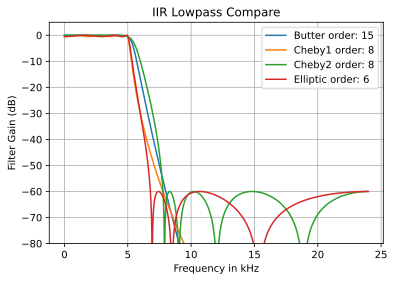

In [21]:
# Memplot respons frekuensi dari filter IIR low-pass dengan berbagai jenis filter
# menggunakan fungsi freqz_resp_cas_list() dari paket iir_d.
# Parameter-parameter yang diberikan adalah daftar second-order sections (sos) dari masing-masing jenis filter,
# tipe respons (dB untuk respons dalam dB), dan frekuensi sampling (48 kHz).
iir_d.freqz_resp_cas_list([sos_but, sos_cheb1, sos_cheb2, sos_elli], 'dB', fs=48)

# Mengatur batas sumbu y dari -80 hingga 5
ylim([-80, 5])

# Menambahkan judul pada plot
title(r'IIR Lowpass Compare')

# Memberi label sumbu y dengan 'Filter Gain (dB)'
ylabel(r'Filter Gain (dB)')

# Memberi label sumbu x dengan 'Frequency in kHz'
xlabel(r'Frequency in kHz')

# Menambahkan legenda dengan urutan filter dan jumlah order untuk setiap jenis filter
legend((r'Butter order: %d' % (len(a_but) - 1),
        r'Cheby1 order: %d' % (len(a_cheb1) - 1),
        r'Cheby2 order: %d' % (len(a_cheb2) - 1),
        r'Elliptic order: %d' % (len(a_elli) - 1)), loc='best')

# Menampilkan grid pada plot
grid()

Diagram tersebut menggambarkan perbandingan respons frekuensi beberapa filter lowpass IIR. Empat jenis filter dibandingkan:

- Butterworth dengan orde 15 (ditunjukkan dalam garis biru)
- Chebyshev Tipe 1 dengan orde 8 (ditunjukkan dalam garis oranye)
- Chebyshev Tipe 2 dengan orde 8 (ditunjukkan dalam garis hijau)
- Elliptic dengan orde 6 (ditunjukkan dalam garis merah)

Sumbu horizontal mewakili frekuensi dalam kHz, sedangkan sumbu vertikal menunjukkan gain filter dalam dB. Grafik ini memberikan gambaran tentang seberapa efektif masing-masing filter dalam mereduksi atau melemahkan sinyal pada berbagai frekuensi.

Beberapa aspek penting dari grafik ini adalah:
- Filter Butterworth (garis biru) menunjukkan transisi yang lebih halus.
- Filter Chebyshev Tipe 1 (garis oranye) menunjukkan lebih banyak riak di bandpass namun memiliki cutoff yang tajam.
- Filter Chebyshev Tipe 2 (garis hijau) menunjukkan riak di bandstop.
- Filter Elliptic (garis merah) menunjukkan riak baik di bandpass maupun bandstop namun memiliki transisi paling tajam di antara keempatnya.

Grafik ini membantu untuk memahami cara kerja masing-masing filter dalam mengelola sinyal pada frekuensi yang berbeda.

(15, 15)

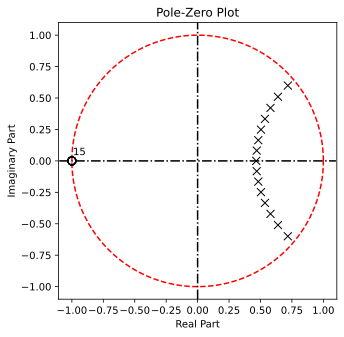

In [22]:
# Menampilkan konfigurasi pole-zero dari filter IIR menggunakan metode sos_zplane()
# dari paket iir_d. Parameter yang diberikan adalah second-order sections (sos) dari filter Butterworth.
iir_d.sos_zplane(sos_but)

Ini adalah diagram pole-zero yang menggambarkan sistem dinamis. Sumbu horizontal mewakili bagian real dan sumbu vertikal mewakili bagian imajiner. Ada dua jenis simbol yang digunakan dalam plot ini:

- Lingkaran kecil kosong: Merepresentasikan posisi zero (nol) dari sistem.
- Simbol silang hitam: Merepresentasikan posisi pole (kutub) dari sistem.

Terdapat lingkaran batas dengan garis merah putus-putus yang berpusat di titik (0,0). Lingkaran ini berfungsi sebagai batas kestabilan sistem, dimana pole di luar lingkaran ini menunjukkan sistem yang tidak stabil.

Bidang ini dibagi dengan dua garis putus-putus hitam yang saling tegak lurus dan melalui titik asal (0,0), satu pada sumbu real dan satu pada sumbu imajiner.

Dalam plot ini, terlihat bahwa zero berada pada koordinat (-1.0, 0) dan pole-pole tersebar di sekitar area real positif.

In [23]:
# Mendesain filter IIR low-pass menggunakan metode Elliptic
# Parameter-parameter yang diberikan adalah normalized cutoff frequencies (1950 dan 2050),
# normalized band edges (0.5), jumlah taps (80), frekuensi sampling (8000 Hz), dan jenis filter ('ellip').
b_lp, a_lp, sos_lp = iir_d.IIR_lpf(1950, 2050, 0.5, 80, 8000., 'ellip')

# Membuat filter IIR dengan metode multirate menggunakan fungsi multirate_IIR()
mr_lp = mrh.multirate_IIR(sos_lp)

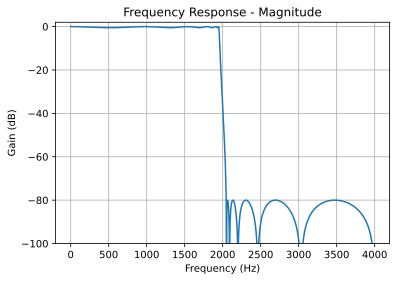

In [24]:
# Menghitung respons frekuensi dari filter IIR menggunakan metode multirate
# Parameter-parameter yang diberikan adalah tipe respons (dB) dan frekuensi sampling (8000 Hz).
mr_lp.freq_resp('db', 8000)

Gambar ini mengilustrasikan grafik respons frekuensi dalam domain magnitude. Grafik ini memiliki sumbu horizontal yang menunjukkan frekuensi dalam Hertz (Hz), mulai dari 0 hingga 4000 Hz. Sumbu vertikal menampilkan gain dalam desibel (dB), dari -100 dB hingga 0 dB.

Grafik ini menampilkan karakteristik low-pass filter, yang berarti hanya frekuensi rendah yang dapat melewati, sementara frekuensi tinggi di atas sekitar 2000 Hz mengalami penurunan atau penolakan yang signifikan. Pada frekuensi di bawah 2000 Hz, gain berada sekitar 0 dB, menunjukkan bahwa sinyal hampir tidak mengalami penurunan saat melewati filter. Namun, setelah melewati sekitar 2000 Hz, gain turun secara drastis mendekati -100 dB, menunjukkan bahwa sinyal sangat tereduksi atau hampir sepenuhnya ditolak pada frekuensi tersebut.

Terdapat juga beberapa osilasi kecil pada frekuensi tinggi di atas 2000 Hz, tetapi tetap pada nilai gain yang rendah.

(-130.0, -30.0)

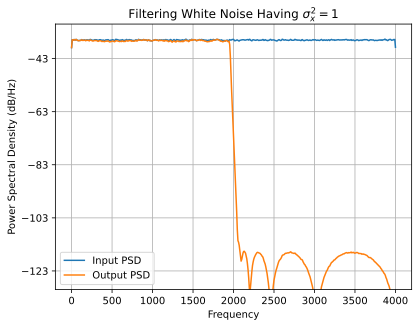

In [25]:
# Menghasilkan 1 juta sampel data acak menggunakan fungsi randn()
x = randn(1000000)

# Memfilter data menggunakan filter multirate yang telah dibuat
y = mr_lp.filter(x)

# Menghitung dan memplot spektrum daya menggunakan fungsi psd()
# Parameter yang diberikan adalah data (x dan y), jumlah sampel FFT (2^10), dan frekuensi sampling (8000 Hz).
psd(x, 2**10, 8000)
psd(y, 2**10, 8000)

# Menambahkan judul pada plot
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')

# Menambahkan legenda dengan label 'Input PSD' dan 'Output PSD' pada lokasi terbaik
legend(('Input PSD', 'Output PSD'), loc='best')

# Mengatur batas sumbu y dari -130 hingga -30
ylim([-130, -30])

Grafik ini menggambarkan plot spektral daya (PSD) yang menampilkan hasil penyaringan suara putih dengan varians
𝜎
𝑥
2
=
1
σ
x
2
​
 =1. Sumbu horizontal (x) mewakili frekuensi dalam satuan yang tidak dijelaskan, sementara sumbu vertikal (y) mewakili kepadatan daya spektral (PSD) dalam dB/Hz.

Garis berwarna biru menunjukkan PSD untuk input (Input PSD) yang tetap konstan, mendekati -43 dB/Hz untuk keseluruhan rentang frekuensi, menandakan bahwa input merupakan suara putih dengan spektrum datar.

Garis berwarna oranye menggambarkan PSD untuk output (Output PSD) setelah proses penyaringan. Dari grafik, terlihat bahwa penyaringan ini secara jelas mengurangi komponen frekuensi antara kira-kira 1900 hingga 2100 Hz, menurunkan PSD menjadi sekitar -123 dB/Hz di rentang tersebut. Frekuensi di luar rentang tersebut mempertahankan nilai yang mendekati input PSD.

Judul grafik adalah "Filtering White Noise Having
𝜎
𝑥
2
=
1
σ
x
2
​
 =1". Grid pada grafik juga membantu dalam membaca nilai frekuensi dan PSD dengan lebih akurat.

In [26]:
# Menentukan frekuensi sampling
fs = 8000

# Menghitung dan mencetak PSD yang diharapkan dalam satuan dB/Hz menggunakan rumus 10*log10(fs)
print('Expected PSD of %2.3f dB/Hz' % (0 - 10 * log10(fs),))

Expected PSD of -39.031 dB/Hz


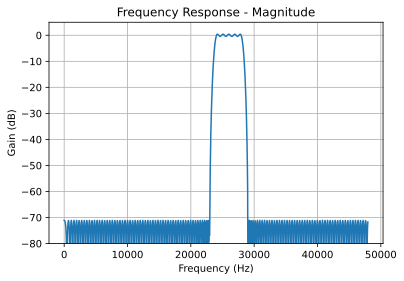

In [27]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();

Grafik ini menampilkan respons frekuensi-magnitude yang menunjukkan keterkaitan antara frekuensi (dalam Hertz) dan gain (dalam desibel). Sumbu horizontal mewakili frekuensi dari 0 hingga 50.000 Hz, sedangkan sumbu vertikal menunjukkan gain, berkisar dari -80 dB sampai 10 dB.

Grafik menunjukkan bahwa gain tetap sekitar 0 dB di antara frekuensi 20.000 Hz dan 30.000 Hz, menandakan bahwa frekuensi-frekuensi ini dilewatkan tanpa banyak atenuasi. Di luar rentang frekuensi ini, gain mengalami penurunan drastis hingga sekitar -80 dB, menunjukkan bahwa frekuensi-frekuensi ini sangat teredam. Grafik ini menggambarkan karakteristik filter band-pass yang memungkinkan hanya frekuensi-frekuensi dalam rentang tertentu (sekitar 20.000 Hz hingga 30.000 Hz) untuk melewati filter tanpa banyak kehilangan energi.

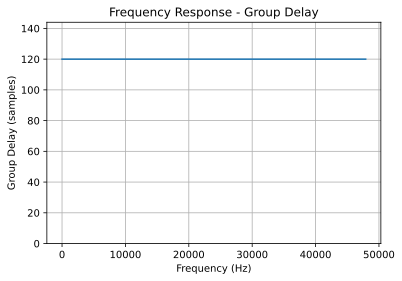

In [28]:
# Mendefinisikan koefisien filter menggunakan metode Remez
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Diagram ini menggambarkan Respons Frekuensi - Tunda Grup (Frequency Response - Group Delay). Sumbu horizontal (x) mewakili Frekuensi (Hz), dengan rentang dari 0 hingga 50.000 Hz. Sumbu vertikal (y) menampilkan Tunda Grup (samples), dengan nilai dari 0 hingga 140.

Dari grafik ini, terlihat bahwa Tunda Grup (Group Delay) tetap konstan sekitar 120 samples di seluruh rentang frekuensi yang ditampilkan. Garis horizontal yang datar menunjukkan bahwa tunda grup tidak mengalami perubahan seiring dengan perubahan frekuensi.

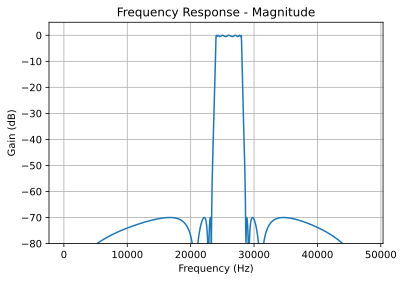

In [29]:
# Merancang filter band-pass menggunakan metode IIR elliptic
b_rec_bpf2, a_rec_bpf2, sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                     0.5,70,96000,'ellip')

# Memplot respons frekuensi filter menggunakan koefisien yang didefinisikan sebelumnya
with np.errstate(divide='ignore'):  # Mengabaikan pembagian dengan nol yang mungkin terjadi
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)

# Menentukan batas vertikal pada plot
ylim([-80, 5])

# Menampilkan grid pada plot
grid();


Pada gambar ini, terdapat plot respons frekuensi dalam domain magnitudo. Berikut adalah beberapa poin penting yang perlu dicatat:

1. Judul Grafik: Grafik ini diberi judul "Frequency Response - Magnitude," yang menandakan bahwa respons frekuensi dari sistem ditampilkan dalam bentuk magnitudo atau gain.

2. Sumbu X: Sumbu horizontal (sumbu x) mewakili frekuensi dalam Hertz (Hz), dengan rentang dari 0 Hz hingga 50.000 Hz.

3. Sumbu Y: Sumbu vertikal (sumbu y) mewakili gain dalam desibel (dB), dengan rentang dari -80 dB hingga 0 dB.

4. Respons Frekuensi: Kurva pada grafik menunjukkan bagaimana gain sistem berubah seiring dengan frekuensi. Dari kurva tersebut, dapat dilihat bahwa:
- Terdapat jendela frekuensi tertentu di sekitar 30.000 Hz di mana gain mencapai nilai maksimum (sekitar 0 dB).
- Di luar jendela frekuensi tersebut, gain menurun secara signifikan, mencapai nilai -80 dB pada beberapa frekuensi.

5. Indikasi Filter Bandpass: Bentuk plot yang menunjukkan puncak gain pada beberapa frekuensi dan penurunan respon yang tajam di luar jendela frekuensi tersebut mengindikasikan bahwa sistem ini kemungkinan adalah sebuah filter bandpass. Filter ini membiarkan frekuensi dalam rentang tertentu melewati dengan gain yang tinggi (sekitar 30.000 Hz) dan meredam frekuensi di luar rentang tersebut.

Filter bandpass seperti ini sering digunakan dalam aplikasi komunikasi atau pengolahan sinyal digital untuk mengisolasi frekuensi yang diinginkan dari sinyal input.

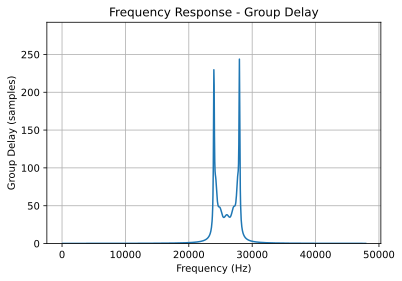

In [30]:
# Mengatur penanganan peringatan ketika terjadi pembagian dengan nol atau nilai yang tidak valid
with np.errstate(divide='ignore', invalid='ignore'):
    # Memplot respons frekuensi filter dalam bentuk delay kelompok (group delay)
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)

# Menampilkan grid pada plot
grid();

Grafik yang diberikan adalah representasi dari respons frekuensi dalam bentuk keterlambatan kelompok (group delay).

Berikut adalah penjelasan elemen-elemen pada grafik:

1. Judul Grafik: "Frequency Response - Group Delay" menunjukkan bahwa grafik ini menggambarkan keterlambatan kelompok terhadap frekuensi.

2. Sumbu X (Horizontal): Dilabeli sebagai "Frequency (Hz)", menunjukkan frekuensi dalam satuan Hertz (Hz), dengan rentang dari 0 hingga 50.000 Hz.

3. Sumbu Y (Vertikal): Diberi label "Group Delay (samples)", menunjukkan keterlambatan kelompok dalam satuan sampel.

4. Kurva atau Garis pada Grafik: Mewakili keterlambatan kelompok sebagai fungsi dari frekuensi. Terdapat dua puncak yang signifikan di sekitar frekuensi 25.000 Hz, menunjukkan peningkatan keterlambatan kelompok pada frekuensi tersebut.

5. Puncak (Peaks): Puncak di sekitar 25.000 Hz menandakan di mana terjadi peningkatan keterlambatan kelompok yang signifikan.

Interpretasi Umum:

- Keterlambatan Kelompok: Ini adalah ukuran berapa banyak waktu satu kelompok frekuensi tertentu tertunda ketika melewati sistem. Penting dalam desain filter dan sistem komunikasi karena keterlambatan kelompok yang besar dapat menyebabkan distorsi dalam sinyal yang diproses.
- Puncak Keterlambatan Kelompok: Puncak di sekitar 25.000 Hz menunjukkan bahwa pada frekuensi ini sinyal mengalami keterlambatan yang relatif besar, yang mungkin mengindikasikan karakteristik filter atau sistem yang menyebabkan ketidakseimbangan waktu pada frekuensi tersebut.




